<h2 style="color: #0A400C;">San Francisco Crime Classification</h2> 

<h2 style="color: #0A400C;">Introduction</h2> 

##### The goal of this project is to predict the category of a crime incident in San Francisco based on time, location, and other available features using classification models.

<h2 style="color: #0A400C;"> Data Fields</h2> 

- **Dates**: Timestamp of the crime incident  
- **Category**: Type of crime (target variable - only in train.csv)  
- **Descript**: Detailed description (only in train.csv)  
- **DayOfWeek**: Day the incident occurred  
- **PdDistrict**: Police department district name  
- **Resolution**: Outcome of the incident (only in train.csv)  
- **Address**: Street address of the incident  
- **X**: Longitude  
- **Y**: Latitude  

<h2 style="color: #0A400C;">Requirements</h2> 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

<h2 style="color: #0A400C;">Import Data</h2> 

In [9]:
train = pd.read_csv("train.csv")

In [10]:
test = pd.read_csv("test.csv")

In [11]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [12]:
train.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212


<h2 style="color: #0A400C;">EDA (Exploratory Data Analysis)</h2> 

In [14]:
train.shape

(878049, 9)

In [15]:
test.shape

(884262, 7)

In [16]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [17]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


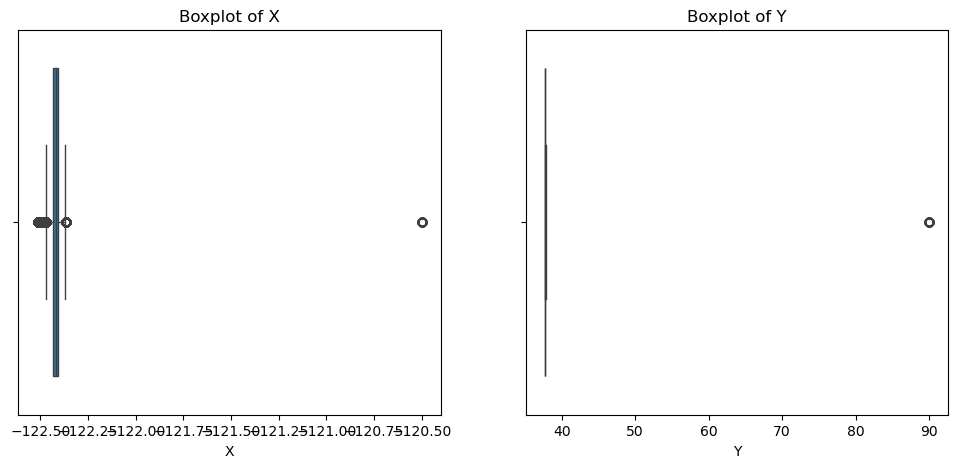

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x="X", data=train)
plt.title("Boxplot of X")

plt.subplot(1,2,2)
sns.boxplot(x="Y", data=train)
plt.title("Boxplot of Y")

plt.show()

<h2 style="color: #0A400C;"> Data Visualization</h2>

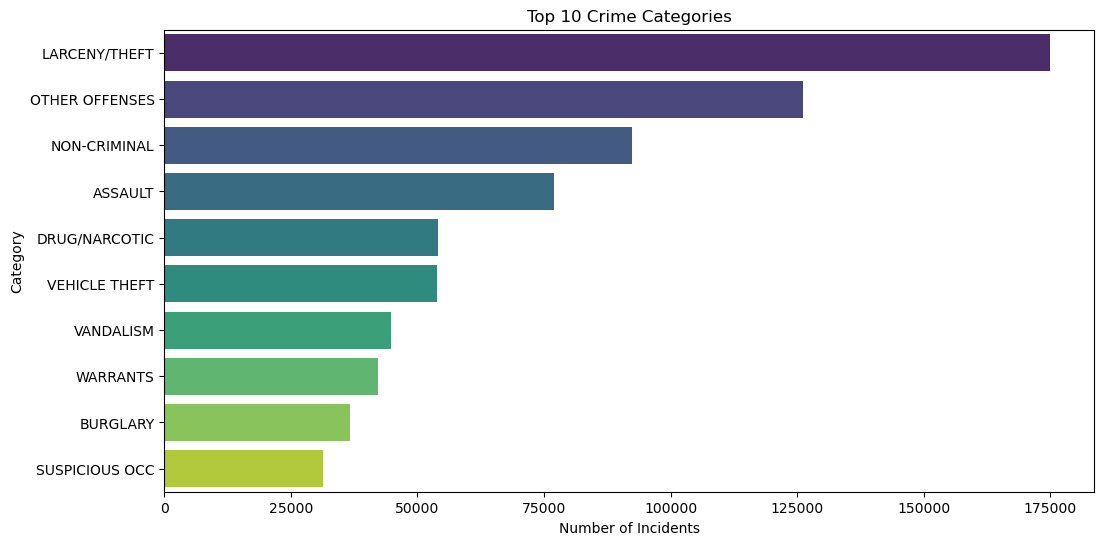

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_categories = train['Category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title("Top 10 Crime Categories")
plt.xlabel("Number of Incidents")
plt.ylabel("Category")
plt.show()

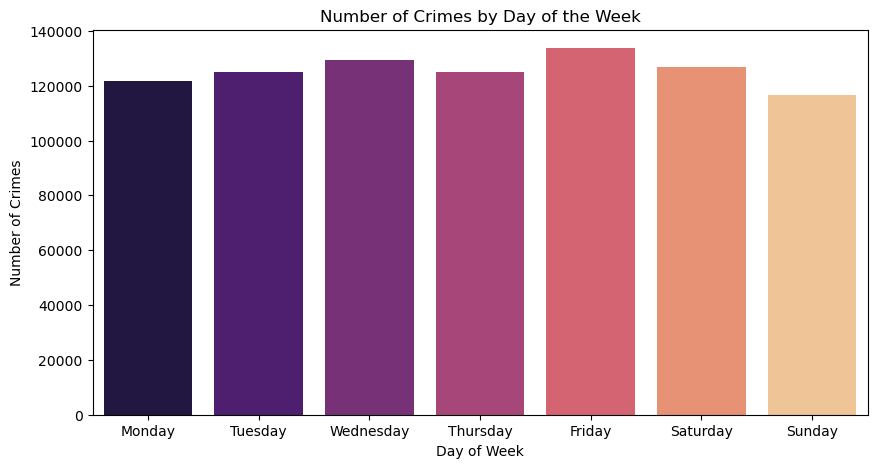

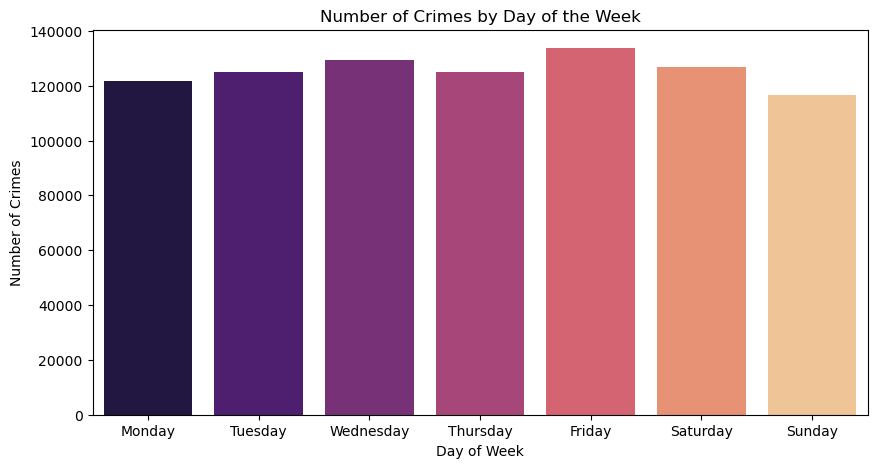

In [22]:
plt.figure(figsize=(10,5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='DayOfWeek', data=train, order=order, palette='magma')
plt.title("Number of Crimes by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.show()
plt.figure(figsize=(10,5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='DayOfWeek', data=train, order=order, palette='magma')
plt.title("Number of Crimes by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.show()

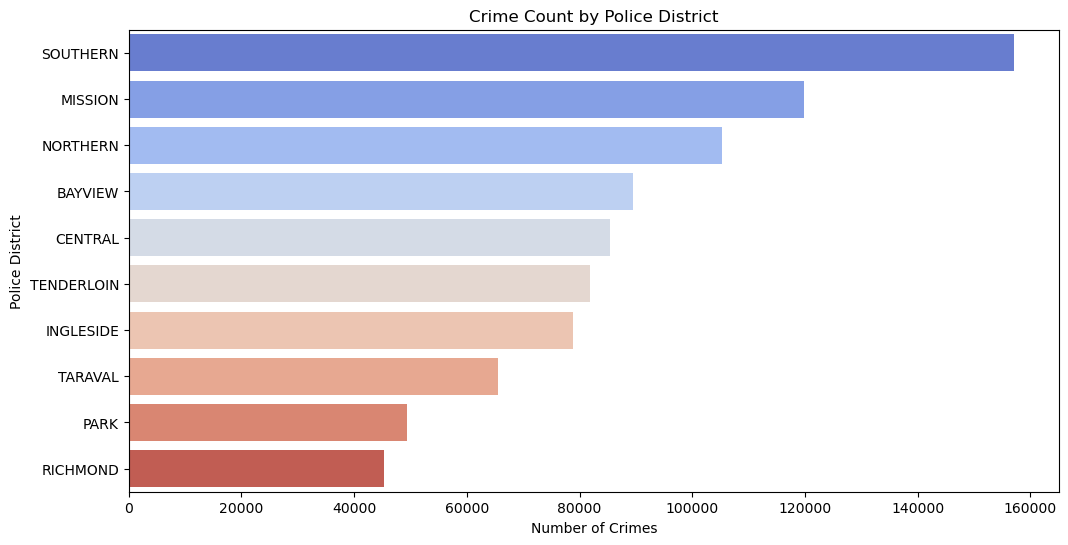

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(y='PdDistrict', data=train, order=train['PdDistrict'].value_counts().index, palette='coolwarm')
plt.title("Crime Count by Police District")
plt.xlabel("Number of Crimes")
plt.ylabel("Police District")
plt.show()

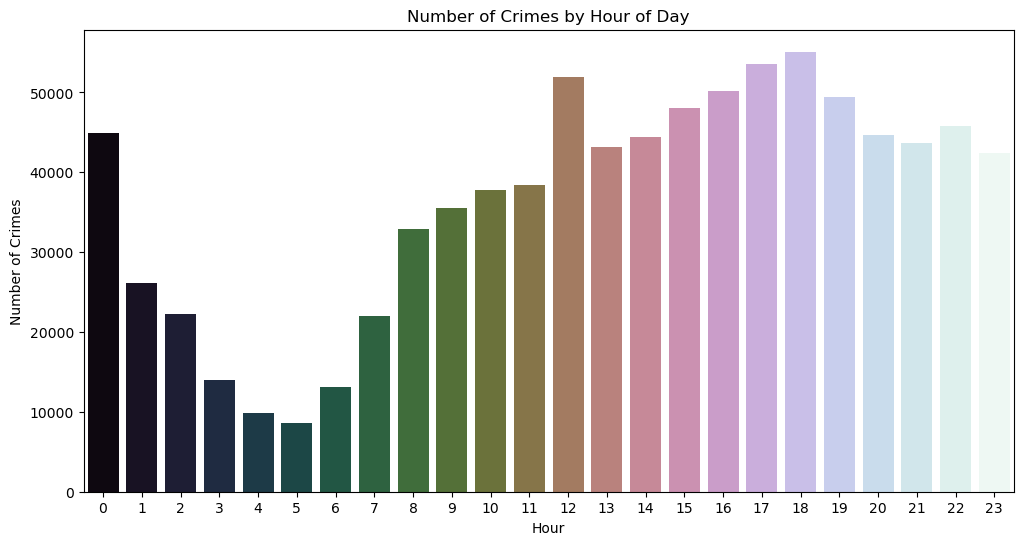

In [24]:
# Convert 'Dates' column to datetime type
train["Dates"] = pd.to_datetime(train["Dates"])

# Extract hour from 'Dates'
train["Hour"] = train["Dates"].dt.hour

# Plot number of crimes by hour of day
plt.figure(figsize=(12,6))
sns.countplot(x="Hour", data=train, palette="cubehelix")
plt.title("Number of Crimes by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.show()

<h2 style="color: #0A400C;">Feature Engineering</h2>

In [26]:
train["Dates"] = pd.to_datetime(train["Dates"])
train["Year"] = train["Dates"].dt.year
train["Month"] = train["Dates"].dt.month
train["Day"] = train["Dates"].dt.day
train["Hour"] = train["Dates"].dt.hour
train["Minute"] = train["Dates"].dt.minute
train["DayOfYear"] = train["Dates"].dt.dayofyear
train["Weekday"] = train["Dates"].dt.weekday  # 0 = Monday
train["IsWeekend"] = train["Weekday"].apply(lambda x: 1 if x >= 5 else 0)  # Saturday=5, Sunday=6
train["Quarter"] = train["Dates"].dt.quarter  # Quarter of the year

train["IsBusinessHour"] = train["Hour"].apply(lambda x: 1 if 9 <= x <= 18 else 0)

<h2 style="color: #0A400C;">Modeling</h2>


In [31]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train["Dates"] = pd.to_datetime(train["Dates"])
train["Year"] = train["Dates"].dt.year
train["Month"] = train["Dates"].dt.month
train["Day"] = train["Dates"].dt.day
train["Hour"] = train["Dates"].dt.hour
train["Minute"] = train["Dates"].dt.minute
train["DayOfYear"] = train["Dates"].dt.dayofyear
train["Weekday"] = train["Dates"].dt.weekday
train["IsWeekend"] = (train["Weekday"] >= 5).astype(int)
train["Quarter"] = train["Dates"].dt.quarter
train["IsBusinessHour"] = ((train["Hour"] >= 9) & (train["Hour"] <= 18)).astype(int)

categorical_cols = ["DayOfWeek", "PdDistrict", "Address"]

for col in categorical_cols:
    le = LabelEncoder()
    combined = pd.concat([train[col], test[col]], axis=0)
    le.fit(combined)
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

target_le = LabelEncoder()
y = target_le.fit_transform(train["Category"])

X = train.drop(["Category", "Dates", "Descript", "Resolution"], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(target_le.classes_),
    learning_rate=0.1,
    n_estimators=1000,
    class_weight='balanced',
    n_jobs=-1,
    verbosity=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=target_le.classes_, zero_division=0))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 3.03309
Accuracy: 0.15923352884232106
                             precision    recall  f1-score   support

                      ARSON       0.01      0.14      0.02       303
                    ASSAULT       0.20      0.01      0.02     15375
                 BAD CHECKS       0.00      0.12      0.01        81
                    BRIBERY       0.00      0.02      0.00        58
                   BURGLARY       0.15      0.20      0.17      7351
         DISORDERLY CONDUCT       0.04      0.15      0.06       864
DRIVING UNDER THE INFLUENCE       0.03      0.42      0.05       454
              DRUG/NARCOTIC       0.33      0.42      0.37     10794
                DRUNKENNESS       0.02      0.21      0.04       856
               EMBEZZLEMENT       0.02      0.29      0.03       233
                  EXTORTION       0.00      0.04      0.00        51
       

<h2 style="color: #0A400C;">Prediction & Submission</h2>


In [ ]:

y_pred_proba = model.predict(X_test, num_iteration=model.best_iteration_)

submission = pd.DataFrame(y_pred_proba, columns=target_le.classes_)

submission.insert(0, 'Id', test.index)

submission.to_csv('submission.csv', index=False)

print("submission.csv kaydedildi!")
